In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogecoin-historical-dataset/doge-usd-max.csv


In [3]:
test_data = pd.read_csv('/kaggle/input/dogecoin-historical-dataset/doge-usd-max.csv')
test_data

,snapped_at,price,market_cap,total_volume
0,2013-12-15 00:00:00 UTC,0.000559,3.488670e+06,0.000000e+00
1,2013-12-17 00:00:00 UTC,0.000218,1.619159e+06,0.000000e+00
2,2013-12-18 00:00:00 UTC,0.000268,2.191987e+06,0.000000e+00
3,2013-12-19 00:00:00 UTC,0.000475,4.299422e+06,0.000000e+00
4,2013-12-20 00:00:00 UTC,0.000989,9.866232e+06,0.000000e+00
...,...,...,...,...
2699,2021-05-09 00:00:00 UTC,0.633615,8.206402e+10,2.941837e+10
2700,2021-05-10 00:00:00 UTC,0.573136,7.436812e+10,4.905329e+10
2701,2021-05-11 00:00:00 UTC,0.451129,5.844156e+10,1.720036e+10
2702,2021-05-12 00:00:00 UTC,0.496731,6.435597e+10,1.529008e+10


In [4]:
pd.core.frame.DataFrame

pandas.core.frame.DataFrame

<AxesSubplot:>

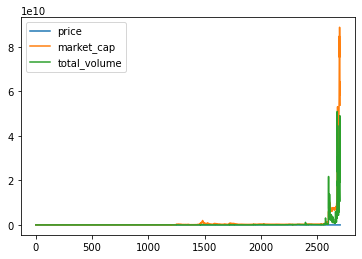

In [5]:
test_data.plot.line()

In [6]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 

In [7]:
# test_data.set_index('snapped_at', inplace=True)

In [8]:
test_data

,snapped_at,price,market_cap,total_volume
0,2013-12-15 00:00:00 UTC,0.000559,3.488670e+06,0.000000e+00
1,2013-12-17 00:00:00 UTC,0.000218,1.619159e+06,0.000000e+00
2,2013-12-18 00:00:00 UTC,0.000268,2.191987e+06,0.000000e+00
3,2013-12-19 00:00:00 UTC,0.000475,4.299422e+06,0.000000e+00
4,2013-12-20 00:00:00 UTC,0.000989,9.866232e+06,0.000000e+00
...,...,...,...,...
2699,2021-05-09 00:00:00 UTC,0.633615,8.206402e+10,2.941837e+10
2700,2021-05-10 00:00:00 UTC,0.573136,7.436812e+10,4.905329e+10
2701,2021-05-11 00:00:00 UTC,0.451129,5.844156e+10,1.720036e+10
2702,2021-05-12 00:00:00 UTC,0.496731,6.435597e+10,1.529008e+10


In [9]:
test_data_11 = test_data.drop(['market_cap','snapped_at' ,'total_volume'], axis=1)
test_data_11

test_data_22 = test_data_11[2600:2703]
test_data_22.append(test_data_22,ignore_index = True)

test_data_22.reset_index().rename(columns={"index":"id"})
test_data_33 = test_data_22.rename_axis('id').reset_index()
test_data_22.index.name='id'
test_data_44 = test_data_22.reset_index()
test_data_44
test_data_22 = test_data_44

## 여기부터 statsmodels 선형 회귀 분석

In [10]:
from statsmodels.formula.api import ols

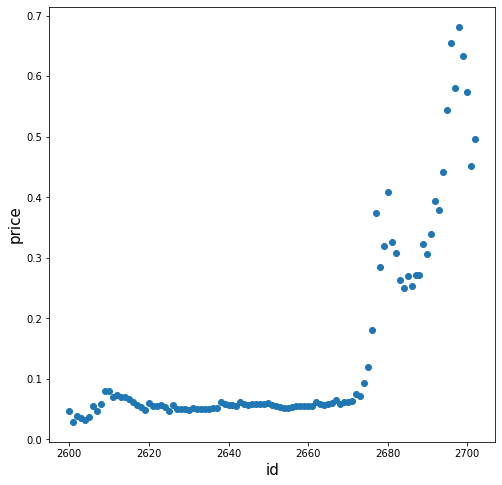

In [11]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(test_data_22['id'],test_data_22['price']) ## 원 데이터 산포도
 
plt.xlabel('id', fontsize=font_size)
plt.ylabel('price',fontsize=font_size)
plt.show()

In [12]:
fit = ols('price ~ id',data=test_data_22).fit()
fit.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f3975435a90>>

In [13]:
print(fit.params.Intercept) ## 절편
print(fit.params.id)

-10.71523862893509
0.004096690196650171


In [14]:
fit.fittedvalues

0     -0.063844
1     -0.059747
2     -0.055651
3     -0.051554
4     -0.047457
         ...   
98     0.337632
99     0.341728
100    0.345825
101    0.349922
102    0.354018
Length: 103, dtype: float64

In [15]:
fit.resid


0      0.111195
1      0.088265
2      0.093640
3      0.086140
4      0.079081
         ...   
98     0.344210
99     0.291887
100    0.227311
101    0.101207
102    0.142713
Length: 103, dtype: float64

In [16]:
fit.predict(exog=dict(id=[2800]))


0    0.755494
dtype: float64

## 여기부터 sklearn 선형 회귀 분석

In [17]:
from sklearn.linear_model import LinearRegression


x = test_data_22['id'].values.reshape(-1,1) ## 차원 증가 시켜준다.
y = test_data_22['price']
 
fit = LinearRegression().fit(x,y)


In [18]:
print(fit.intercept_) ## 절편
print(fit.coef_)

-10.715238628935097
[0.00409669]


AttributeError: module 'tensorflow._api.v2.train' has no attribute 'GradientDescentOptimizer'

In [19]:
fit.predict(x)


array([-0.06384412, -0.05974743, -0.05565074, -0.05155405, -0.04745736,
       -0.04336067, -0.03926398, -0.03516729, -0.0310706 , -0.02697391,
       -0.02287722, -0.01878053, -0.01468384, -0.01058715, -0.00649045,
       -0.00239376,  0.00170293,  0.00579962,  0.00989631,  0.013993  ,
        0.01808969,  0.02218638,  0.02628307,  0.03037976,  0.03447645,
        0.03857314,  0.04266983,  0.04676652,  0.05086321,  0.0549599 ,
        0.05905659,  0.06315328,  0.06724997,  0.07134666,  0.07544335,
        0.07954004,  0.08363673,  0.08773342,  0.09183011,  0.0959268 ,
        0.10002349,  0.10412018,  0.10821687,  0.11231356,  0.11641025,
        0.12050694,  0.12460363,  0.12870032,  0.13279701,  0.1368937 ,
        0.14099039,  0.14508708,  0.14918377,  0.15328046,  0.15737715,
        0.16147384,  0.16557053,  0.16966722,  0.17376391,  0.1778606 ,
        0.18195729,  0.18605398,  0.19015067,  0.19424736,  0.19834405,
        0.20244075,  0.20653744,  0.21063413,  0.21473082,  0.21

In [20]:
fit.predict([[2800]])


array([0.75549392])

## 여기부터 ~~

0 [492320.12] [185.688]
0 1.7036064e+18


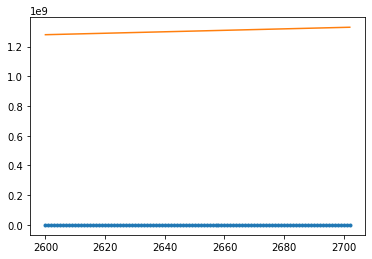

1 [-3.4603588e+11] [-1.3051389e+08]
1 8.416203e+29


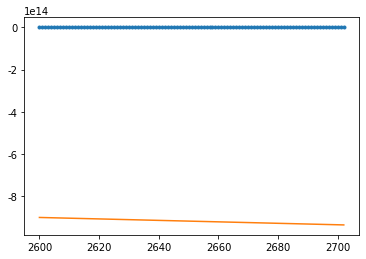

2 [2.432174e+17] [9.1734e+13]
2 inf


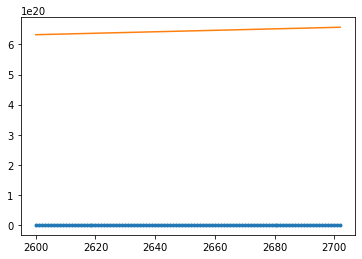

3 [-1.7094962e+23] [-6.4476853e+19]
3 inf


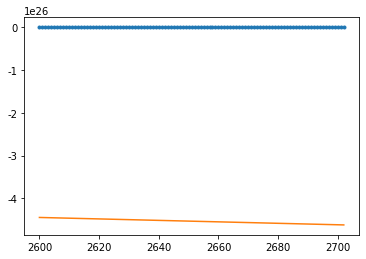

4 [1.2015496e+29] [4.531869e+25]
4 inf


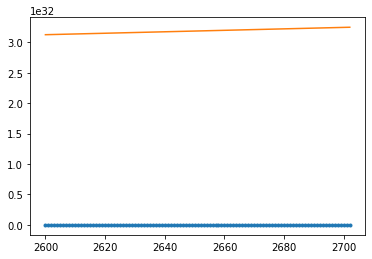

5 [-8.445303e+34] [-3.1853039e+31]
5 inf


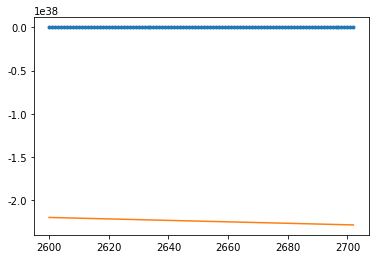

6 [inf] [inf]
6 inf


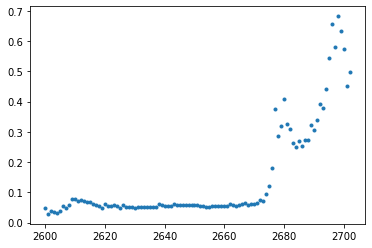

7 [nan] [nan]
7 nan


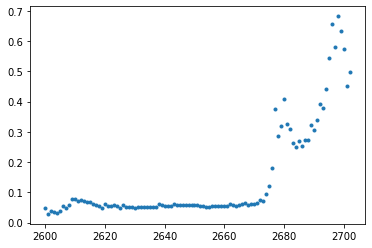

In [26]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

W = tf.Variable(tf.random_uniform([1], -1.0, 0.0))
b = tf.Variable(tf.zeros([1]))
y1 = W * x + b

loss = tf.reduce_mean(tf.square(y1 - y))
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for step in range(8):
     sess.run(train)
     print(step, sess.run(W), sess.run(b))
     print(step, sess.run(loss))

     #Graphic display
     plt.plot(x, y, '.')
     plt.plot(x, sess.run(W) * x + sess.run(b))

     plt.show()